# Probability Distribution

### A. Independencies

In [ ]:
import pgmpy
from pgmpy.independencies import IndependenceAssertion, Independencies

In [ ]:
assertion1 = IndependenceAssertion('X', 'Y') 
assertion2 = IndependenceAssertion('X', 'Y', 'Z') 
print assertion1, assertion2

In [ ]:
independencies = Independencies()
print independencies.get_assertions()
independencies.add_assertions(assertion1, assertion2)
print independencies.get_assertions()
    # alternatively, initialize with some assertions:
    #  - Independencies(assertion1, assertion2)
    #  - Independencies(['X','Y'],['X','Y','Z'])

### B. Joint Distribution

In [ ]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [ ]:
distribution = Joint(['coin1','coin2'], # variables
                     [2,2],             # cardinalities
                     [.25,.25,.25,.25]) # values
print distribution

In [ ]:
print distribution.check_independence(['coin1'],['coin2'])

### C. Conditional Probability Distribution

In [ ]:
from pgmpy.factors import TabularCPD

In [ ]:
# P(Q)
quality = TabularCPD(variable='Quality',
                     variable_card=3,
                     values=[[.3],[.5],[.2]])
# P(L)
location = TabularCPD(variable='Location',
                      variable_card=2,
                      values=[[.6],[.4]])
# P(C|Q,L)
cost = TabularCPD(variable='Cost',
                  variable_card=2,
                  values=[[.8,.6,.1,.6,.6,.05],
                          [.2,.4,.9,.4,.4,.95]],
                  evidence=['Q','L'],
                  evidence_card=[3,2])
print "P(Q):\n", quality
print "P(L):\n", location
print "P(C|Q,L):\n", cost

# Bayesian Network

### A. Representational Example

In [ ]:
from IPython.display import Image, display
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/PGM/FIGS/bayesian_network_example.png",width="35%"))

**Joint Distribution: ** $ P(A,R,J,G,L,Q) = P(A)\cdot P(R)\cdot P(J|A,R)\cdot P(G)\cdot P(L|G,J)\cdot P(Q|J) $

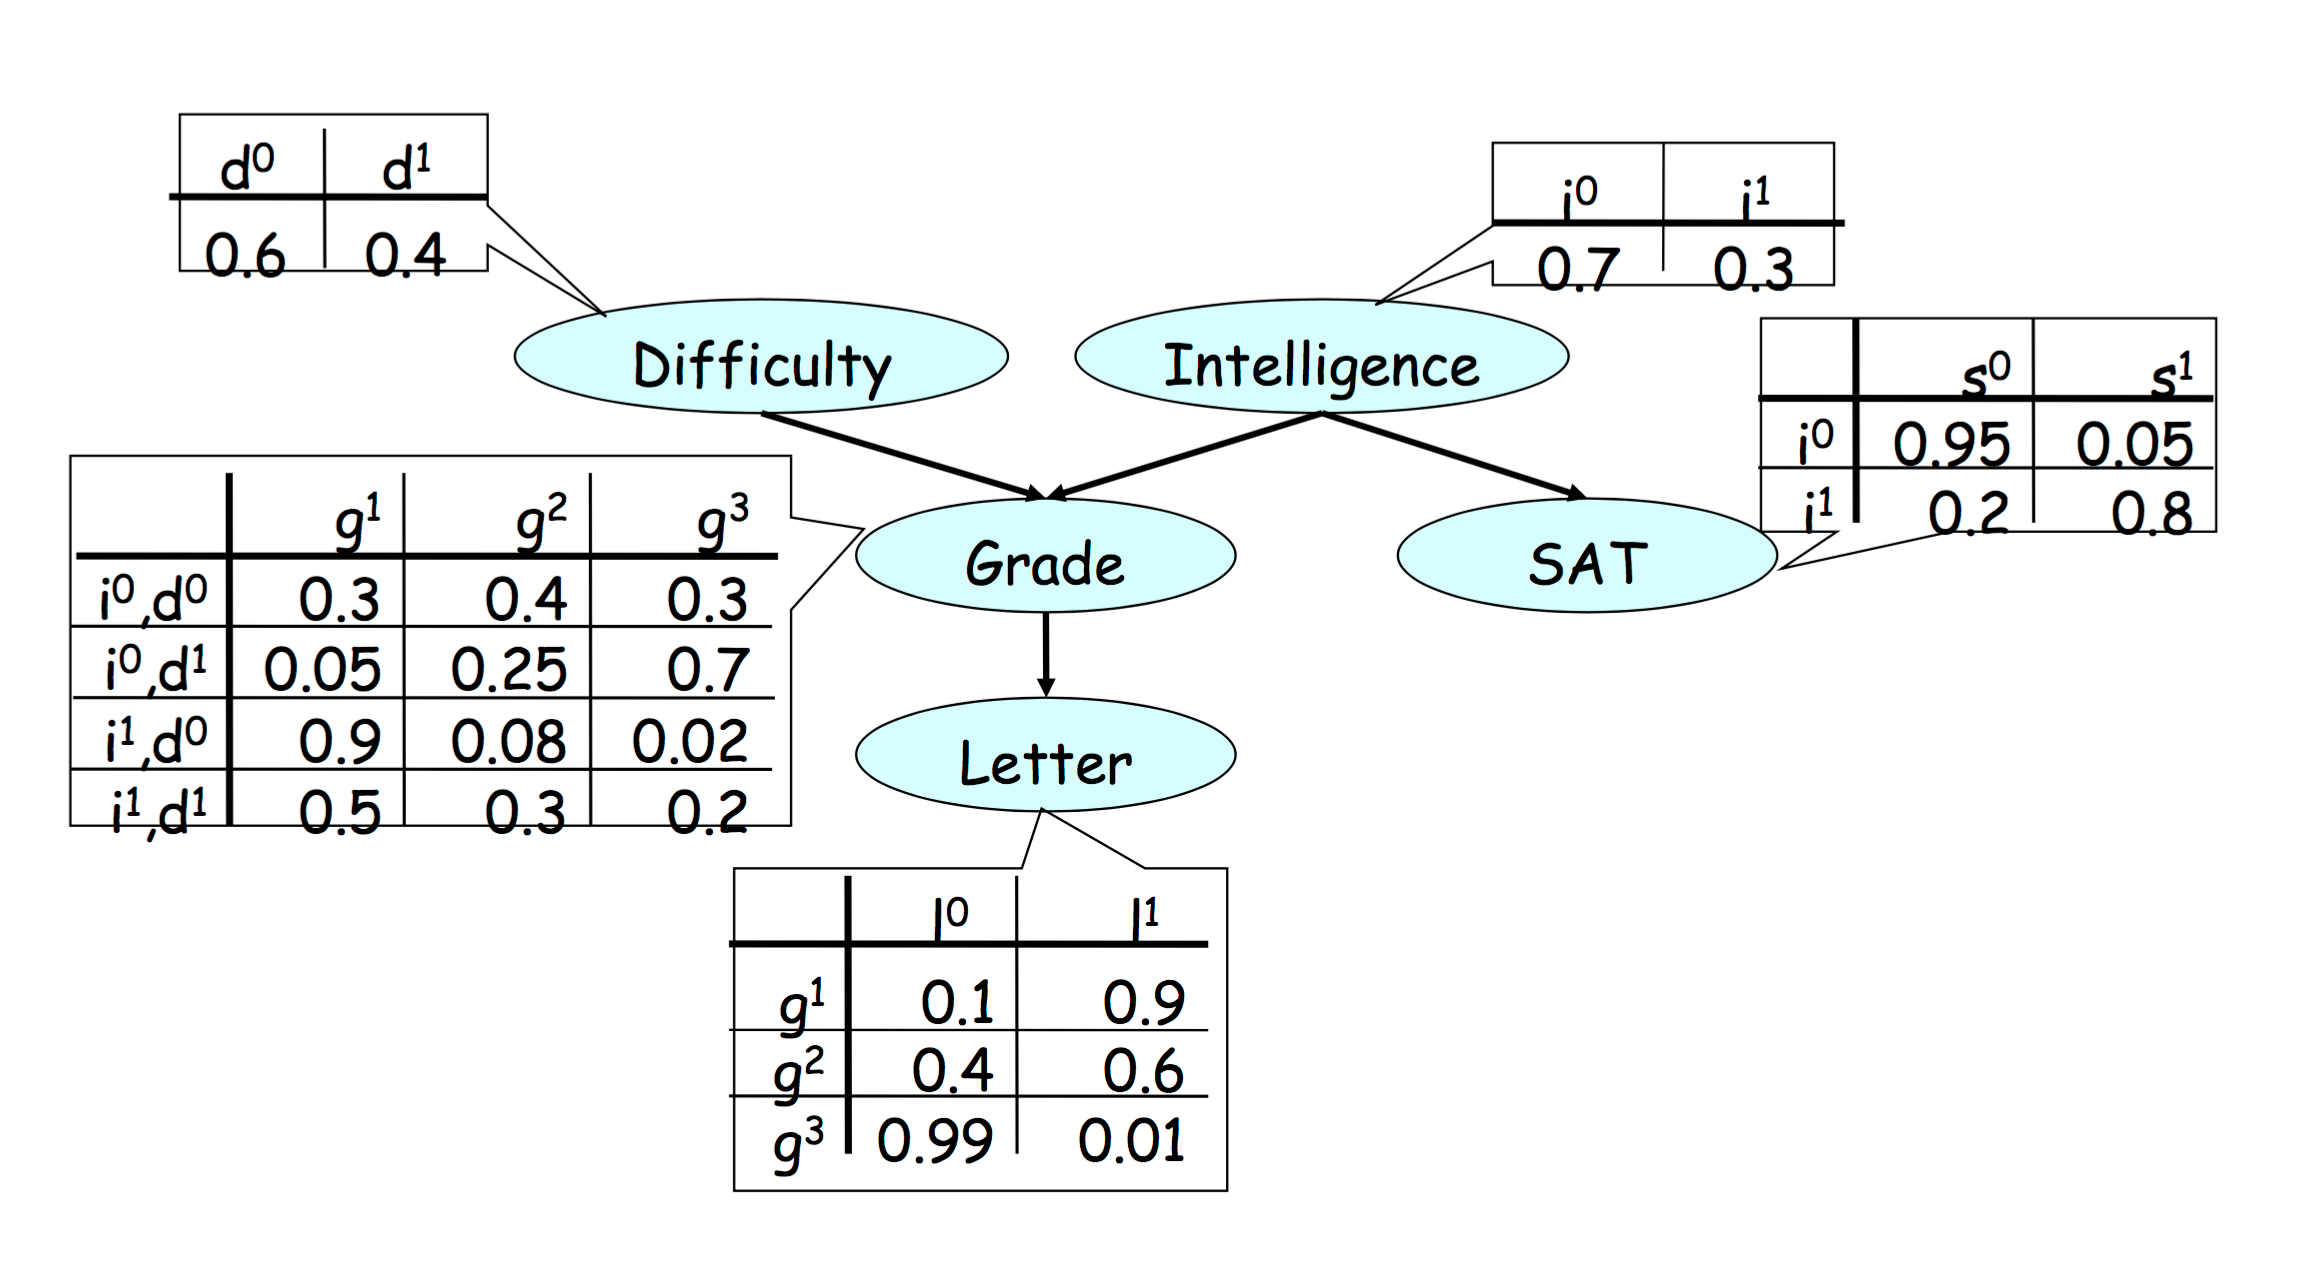

In [6]:
from IPython.display import Image, display
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/PGM/FIGS/bayesian_network_example2.png",width="50%"))

### B. Building Network

In [22]:
from pgmpy.models import BayesianModel

In [7]:
model = BayesianModel()
edges = [('D','G'),('I','G'),('I','S'),('G','L')]
for fromNode,toNode in edges:
    model.add_edge(fromNode,toNode)

In [8]:
print model.edges()

[('I', 'S'), ('I', 'G'), ('D', 'G'), ('G', 'L')]


In [9]:
print model.nodes()
print "Intelligence, SAT, Difficulty, Grade, Letter"

['I', 'S', 'D', 'G', 'L']
Intelligence, SAT, Difficulty, Grade, Letter


In [10]:
from pgmpy.factors import TabularCPD

In [11]:
cpdI = TabularCPD('I',2,[[.7],[.3]])
cpdD = TabularCPD('D',2,[[.6],[.4]])
cpdS = TabularCPD('S',2,
                  [[.95,.2],
                   [.05,.8]],
                  evidence=['I'],
                  evidence_card=[2])
cpdG = TabularCPD('G',3,
                  [[.3,.05,.9,.5],
                   [.4,.25,.08,.3],
                   [.3,.7,.02,.2]],
                  evidence=['I','D'],
                  evidence_card=[2,2])
cpdL = TabularCPD('L',2,
                  [[.1,.4,.99],
                   [.9,.6,.01]],
                  evidence=['G'],
                  evidence_card=[3])

In [12]:
model.add_cpds(cpdI,cpdD,cpdS,cpdG,cpdL)
for cpd in model.cpds:
    print cpd

+-----+-----+
| I_0 | 0.7 |
+-----+-----+
| I_1 | 0.3 |
+-----+-----+
+-----+-----+
| D_0 | 0.6 |
+-----+-----+
| D_1 | 0.4 |
+-----+-----+
+-----+------+-----+
| I   | I_0  | I_1 |
+-----+------+-----+
| S_0 | 0.95 | 0.2 |
+-----+------+-----+
| S_1 | 0.05 | 0.8 |
+-----+------+-----+
+-----+-----+------+------+-----+
| I   | I_0 | I_0  | I_1  | I_1 |
+-----+-----+------+------+-----+
| D   | D_0 | D_1  | D_0  | D_1 |
+-----+-----+------+------+-----+
| G_0 | 0.3 | 0.05 | 0.9  | 0.5 |
+-----+-----+------+------+-----+
| G_1 | 0.4 | 0.25 | 0.08 | 0.3 |
+-----+-----+------+------+-----+
| G_2 | 0.3 | 0.7  | 0.02 | 0.2 |
+-----+-----+------+------+-----+
+-----+-----+-----+------+
| G   | G_0 | G_1 | G_2  |
+-----+-----+-----+------+
| L_0 | 0.1 | 0.4 | 0.99 |
+-----+-----+-----+------+
| L_1 | 0.9 | 0.6 | 0.01 |
+-----+-----+-----+------+


### C. Doing Inference

In [13]:
from pgmpy.inference import VariableElimination, Inference

In [21]:
infer = VariableElimination(model)
pd0 = infer.query(variables='D')['D'].values[0]
pi1 = infer.query(variables='I')['I'].values[1]
pg2_d0i1 = infer.query(variables='G',evidence={'D':0,'I':1})['G'].values[2]
ps1_i1 = infer.query(variables='S',evidence={'I':1})['S'].values[1]
pl1_g2 = infer.query(variables='L',evidence={'G':2})['L'].values[1]
print "P(d0,i1,g2,s1,l1) = ", pd0*pi1*pg2_d0i1*ps1_i1*pl1_g2

P(d0,i1,g2,s1,l1) =  0.001008
